# CAT-DATASET

### ABSTRACT:
#### *Is there a cat in your data?*

A common task in machine learning pipelines is encoding categorical variables for a given algorithm in a format that allows as much useful signal as possible to be captured.

Because this is such a common task and important skill to master, we've put together a dataset that contains only categorical features, and includes:

binary features
low- and high-cardinality nominal features
low- and high-cardinality ordinal features
(potentially) cyclical features.

### AIM:

Our aim is to find out the supervised machine learning algorithm and various hyperparameter tuning methods  which will give the best accuracy scores by taking the train.csv dataset from the kaggle competition.

### SOURCE:
 The following link is the source of training dataset.
 https://www.kaggle.com/c/cat-in-the-dat/data

### Importing Necessary Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas_profiling import ProfileReport

from scipy import stats
import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder

from sklearn import model_selection
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier,BalancedBaggingClassifier

from sklearn import feature_selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding as LLE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.metrics import *


In [3]:
def load_data(input_=["C:/Users/sushr/Downloads/train.csv/train.csv"],
              sample_f=0.05):
    train = pd.read_csv(input_[0])
    # test=pd.read_csv(input_[1])
    if sample_f!= 0:
        train = train.sample(frac=sample_f)
    train.loc[:, train.columns != "id"] = train.loc[:, train.columns != "id"]\
        .astype("category").apply(lambda x: x.cat.codes)
    train.drop(['id'],axis=1,inplace=True)
    
    X=train.drop("target",axis=1)
    y=train["target"]
    
    X,y=SMOTE().fit_resample(X,y)
    
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    return(x_train,x_test,y_train,y_test)

In [4]:
# Creating a new dataframe to show all the machine learning models and respective various accuracy
Result=pd.DataFrame({'Model-Name':[],
                   'AUC_Train Accuracy':[],
                    'AUC_Test Accuracy':[],
                    'Train Accuracy':[],
                    'Test Accuracy':[],
                    'F1 Score_Train':[],
                    'F1 Score_Test':[]
                    })

In [5]:
x_train,x_test,y_train,y_test=load_data()

## Logistic Regression

In [6]:
Log_Reg=LogisticRegression(penalty="elasticnet",solver="saga",l1_ratio=0.10)
Log_Reg.fit(x_train,y_train)

C:\Users\sushr\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(l1_ratio=0.1, penalty='elasticnet', solver='saga')

In [7]:
print("train score: ",Log_Reg.score(x_train,y_train))
print("test score: ",Log_Reg.score(x_test,y_test))

train score:  0.6615321526514084
test score:  0.6618144541260892


In [8]:
y_train.value_counts()

0    19556
1    19461
Name: target, dtype: int64

In [9]:
y_train_pred=Log_Reg.predict(x_train)
y_test_pred=Log_Reg.predict(x_test)

In [10]:
Result=Result.append({'Model-Name':"Logistic Regression",
                   'AUC_Train Accuracy':roc_auc_score(y_train,y_train_pred),
                    'AUC_Test Accuracy':roc_auc_score(y_test,y_test_pred),
                    'Train Accuracy':Log_Reg.score(x_train,y_train),
                    'Test Accuracy':Log_Reg.score(x_test,y_test),
                    'F1 Score_Train':f1_score(y_train,y_train_pred),
                    'F1 Score_Test':f1_score(y_test,y_test_pred)
                    },ignore_index=True)

## AdaBooster Classifier

In [11]:
adb=AdaBoostClassifier(n_estimators=550,random_state=42)
adb.fit(x_train,y_train)
print("Train score: ",adb.score(x_train,y_train))
print("Test score: ",adb.score(x_test,y_test))

Train score:  0.8193351615962273
Test score:  0.8133264992311635


In [12]:
y_train_pred=adb.predict(x_train)
y_test_pred=adb.predict(x_test)

In [13]:
Result=Result.append({'Model-Name':"AdaBoost Classifier",
                   'AUC_Train Accuracy':roc_auc_score(y_train,y_train_pred),
                    'AUC_Test Accuracy':roc_auc_score(y_test,y_test_pred),
                    'Train Accuracy':adb.score(x_train,y_train),
                    'Test Accuracy':adb.score(x_test,y_test),
                    'F1 Score_Train':f1_score(y_train,y_train_pred),
                    'F1 Score_Test':f1_score(y_test,y_test_pred)
                    },ignore_index=True)

## Decision Tree

In [14]:
DT=DecisionTreeClassifier(max_depth=5,max_leaf_nodes=9,min_samples_split=10)
DT.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=9, min_samples_split=10)

In [15]:
print("Train Score: ",DT.score(x_train,y_train))
print("Test Score: ",DT.score(x_test,y_test))

Train Score:  0.7085885639592998
Test Score:  0.7049718093285494


### Applying GridSearch CV

In [16]:
param={"max_depth":[2,3,4,5,6,7,8],
      "max_leaf_nodes":[4,5,6,7,8,9,10]}

grid=GridSearchCV(DecisionTreeClassifier(random_state=40),
                                         param_grid=param,
                                         n_jobs=1,
                                        cv=3)
grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=40), n_jobs=1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_leaf_nodes': [4, 5, 6, 7, 8, 9, 10]})

In [17]:
grid.best_params_

{'max_depth': 5, 'max_leaf_nodes': 10}

In [18]:
grid.best_score_

0.7159442100570151

### Applying the best grid_parameter to model

In [19]:
DT=DecisionTreeClassifier(**grid.best_params_)
DT.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10)

In [20]:
print("Train Score: ",DT.score(x_train,y_train))
print("Test Score: ",DT.score(x_test,y_test))

Train Score:  0.71453469000692
Test Score:  0.7127626858021527


In [21]:
y_train_pred=DT.predict(x_train)
y_test_pred=DT.predict(x_test)

In [22]:
Result=Result.append({'Model-Name':"Decision Tree",
                   'AUC_Train Accuracy':roc_auc_score(y_train,y_train_pred),
                    'AUC_Test Accuracy':roc_auc_score(y_test,y_test_pred),
                    'Train Accuracy':DT.score(x_train,y_train),
                    'Test Accuracy':DT.score(x_test,y_test),
                    'F1 Score_Train':f1_score(y_train,y_train_pred),
                    'F1 Score_Test':f1_score(y_test,y_test_pred)
                    },ignore_index=True)

## Random Forest

In [23]:
RF=RandomForestClassifier(n_estimators=200,max_depth=7,max_leaf_nodes=10,random_state=42,n_jobs=-1)
RF.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, max_leaf_nodes=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [24]:
print("Train Score: ",RF.score(x_train,y_train))
print("Test Score: ",RF.score(x_test,y_test))

Train Score:  0.7634877104851732
Test Score:  0.759917990773962


In [25]:
y_train_pred=RF.predict(x_train)
y_test_pred=RF.predict(x_test)

In [26]:
Result=Result.append({'Model-Name':"Random Forest",
                   'AUC_Train Accuracy':roc_auc_score(y_train,y_train_pred),
                    'AUC_Test Accuracy':roc_auc_score(y_test,y_test_pred),
                    'Train Accuracy':RF.score(x_train,y_train),
                    'Test Accuracy':RF.score(x_test,y_test),
                    'F1 Score_Train':f1_score(y_train,y_train_pred),
                    'F1 Score_Test':f1_score(y_test,y_test_pred)
                    },ignore_index=True)

## Feature Selection Using Variance Threshold

In [27]:
pipe=Pipeline([("Feature Selection",VarianceThreshold(0.95)),
              ("Classification",adb)])

pipe.fit(x_train,y_train)

Pipeline(steps=[('Feature Selection', VarianceThreshold(threshold=0.95)),
                ('Classification',
                 AdaBoostClassifier(n_estimators=550, random_state=42))])

In [28]:
print("Train Score: ",pipe.score(x_train,y_train))
print("Test Score: ",pipe.score(x_test,y_test))

Train Score:  0.7983699413076352
Test Score:  0.7904664274730907


### Classification Report

In [29]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79      4830
           1       0.79      0.80      0.79      4925

    accuracy                           0.79      9755
   macro avg       0.79      0.79      0.79      9755
weighted avg       0.79      0.79      0.79      9755



In [30]:
def predict_and_plot(inputs, targets, name=''):
    preds = pipe.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 79.84%


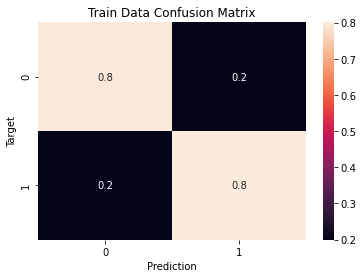

In [31]:
train_preds=predict_and_plot(x_train,y_train,"Train Data")

Accuracy: 79.05%


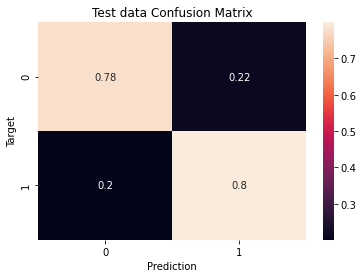

In [32]:
test_preds = predict_and_plot(x_test, y_test, 'Test data')

In [33]:
y_train_pred=pipe.predict(x_train)
y_test_pred=pipe.predict(x_test)

In [34]:
Result=Result.append({'Model-Name':"AdaBoost after Variance Threshold",
                   'AUC_Train Accuracy':roc_auc_score(y_train,y_train_pred),
                    'AUC_Test Accuracy':roc_auc_score(y_test,y_test_pred),
                    'Train Accuracy':pipe.score(x_train,y_train),
                    'Test Accuracy':pipe.score(x_test,y_test),
                    'F1 Score_Train':f1_score(y_train,y_train_pred),
                    'F1 Score_Test':f1_score(y_test,y_test_pred)
                    },ignore_index=True)

## Feature selection using mutual_info classifier

In [35]:
Ml_info=feature_selection.mutual_info_classif(x_train,y_train,discrete_features=True)
pipe=Pipeline([("Feature Selection",feature_selection.SelectKBest(score_func=feature_selection.mutual_info_classif)),
              ("Classification",adb)])

In [36]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('Feature Selection',
                 SelectKBest(score_func=<function mutual_info_classif at 0x000002E1D48B0820>)),
                ('Classification',
                 AdaBoostClassifier(n_estimators=550, random_state=42))])

In [37]:
print('Train score:',pipe.score(x_train,y_train))
print('Test score:',pipe.score(x_test,y_test))

Train score: 0.7861188712612451
Test score: 0.7802152742183496


In [38]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      4830
           1       0.79      0.78      0.78      4925

    accuracy                           0.78      9755
   macro avg       0.78      0.78      0.78      9755
weighted avg       0.78      0.78      0.78      9755



In [39]:
confusion_matrix(y_test,pipe.predict(x_test))

array([[3784, 1046],
       [1098, 3827]], dtype=int64)

In [40]:
# plot this threshold value
roc_auc_score(y_test,pipe.predict(x_test))

0.780246345282761

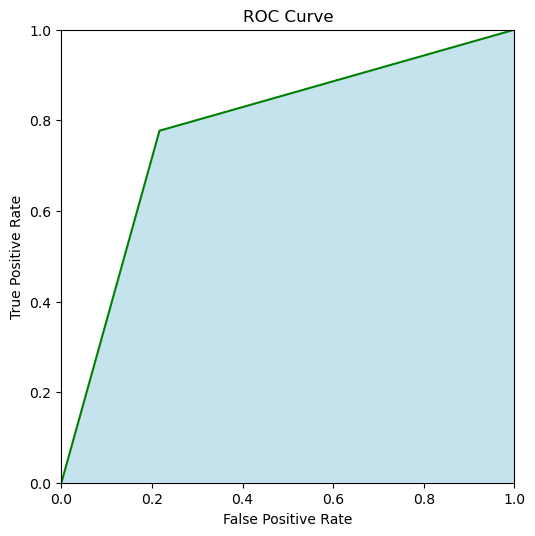

In [41]:
false_positive_rate, true_positive_rate, thresolds = roc_curve(y_test,pipe.predict(x_test))

plt.figure(figsize=(8, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
#plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")

plt.ylabel("True Positive Rate")
plt.show()

In [42]:
y_train_pred=pipe.predict(x_train)
y_test_pred=pipe.predict(x_test)

In [43]:
Result=Result.append({'Model-Name':"AdaBoost after mutual_info_classifier",
                   'AUC_Train Accuracy':roc_auc_score(y_train,y_train_pred),
                    'AUC_Test Accuracy':roc_auc_score(y_test,y_test_pred),
                    'Train Accuracy':pipe.score(x_train,y_train),
                    'Test Accuracy':pipe.score(x_test,y_test),
                    'F1 Score_Train':f1_score(y_train,y_train_pred),
                    'F1 Score_Test':f1_score(y_test,y_test_pred)
                    },ignore_index=True)

## PCA

In [44]:
# changing the n_estimators value of Ada Boost Classifier
adb=AdaBoostClassifier(n_estimators=200,random_state=42)


In [45]:
pipe=Pipeline([("Feature Selection",PCA(n_components=0.95)),
              ("Classification",adb)])
pipe.fit(x_train,y_train)

Pipeline(steps=[('Feature Selection', PCA(n_components=0.95)),
                ('Classification',
                 AdaBoostClassifier(n_estimators=200, random_state=42))])

In [46]:
print("Train Score: ",pipe.score(x_train,y_train))
print("Test Score: ",pipe.score(x_test,y_test))

Train Score:  0.5527846835994566
Test Score:  0.521783700666325


In [47]:
y_train_pred=pipe.predict(x_train)
y_test_pred=pipe.predict(x_test)

In [48]:
Result=Result.append({'Model-Name':"AdaBoost after PCA",
                   'AUC_Train Accuracy':roc_auc_score(y_train,y_train_pred),
                    'AUC_Test Accuracy':roc_auc_score(y_test,y_test_pred),
                    'Train Accuracy':pipe.score(x_train,y_train),
                    'Test Accuracy':pipe.score(x_test,y_test),
                    'F1 Score_Train':f1_score(y_train,y_train_pred),
                    'F1 Score_Test':f1_score(y_test,y_test_pred)
                    },ignore_index=True)

## Conclusion

In [50]:
Result

,Model-Name,AUC_Train Accuracy,AUC_Test Accuracy,Train Accuracy,Test Accuracy,F1 Score_Train,F1 Score_Test
0,Logistic Regression,0.661587,0.661634,0.661532,0.661814,0.668441,0.670067
1,AdaBoost Classifier,0.819345,0.813244,0.819335,0.813326,0.819686,0.816339
2,Decision Tree,0.714495,0.712939,0.714535,0.712763,0.709327,0.709517
3,Random Forest,0.763343,0.760492,0.763488,0.759918,0.748020,0.746866
4,AdaBoost after Variance Threshold,0.798375,0.790383,0.798370,0.790466,0.798401,0.793827
5,AdaBoost after mutual_info_classifier,0.786115,0.780246,0.786119,0.780215,0.785338,0.781180
6,AdaBoost after PCA,0.552807,0.521514,0.552785,0.521784,0.556197,0.536973


**From above Result table,it is clearly seen that AdaBoost Classifier gives the best Accuracy(F1 Score,AUC).**